이 노트북은 [케라스 창시자에게 배우는 딥러닝 2판](https://tensorflow.blog/kerasdl2/)의 예제 코드를 담고 있습니다.

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/deep-learning-with-python-2nd/blob/master/chapter03_introduction-to-keras-and-tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
</td></tr></table>

# 케라스와 텐서플로 소개

## 텐서플로란?

## 케라스란?

## 케라스와 텐서플로의 간략한 역사

## 딥러닝 작업 환경 설정하기

### 주피터 노트북: 권장하는 딥러닝 실험 도구

### 코랩 사용하기

#### 코랩 시작하기

#### pip로 패키지 설치하기

#### GPU 런타임 사용하기

## 텐서플로 시작하기

#### 상수 텐서와 변수

**모두 1 또는 모두 0인 텐서**

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [4]:
import numpy as np
np.ones((2,1))

array([[1.],
       [1.]])

In [ ]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [5]:
import numpy as np
np.zeros((2,1))

array([[0.],
       [0.]])

**랜덤 텐서**

In [6]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.140513  ]
 [-1.0737122 ]
 [-0.05505307]], shape=(3, 1), dtype=float32)


In [7]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.06546164]
 [0.5388042 ]
 [0.08056474]], shape=(3, 1), dtype=float32)


**넘파이 배열에 값 할당하기**

In [8]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**텐서플로 변수 만들기**

In [9]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.5556542],
       [ 1.3683686],
       [-0.7471771]], dtype=float32)>


**텐서플로 변수에 값 할당하기**

In [10]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**변수 일부에 값 할당하기**

In [11]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**`assign_add` 사용하기**

In [12]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### 텐서 연산: 텐서플로에서 수학 계산하기

**기본적인 수학 연산**

In [13]:
a = tf.ones((2, 2))
print(a)
b = tf.square(a)
print(b)
c = tf.sqrt(a)
print(c)
d = b + c
print(d)
e = tf.matmul(a, b)
print(e)
e *= d
print(e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


#### GradientTape API 다시 살펴 보기

**`GradientTape` 사용하기**

In [14]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [16]:
?tf.square

**상수 입력 텐서와 함께 `GradientTape` 사용하기**

In [15]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**그레이디언트 테이프를 중첩하여 이계도 그레이디언트를 계산하기**

In [17]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

#### 엔드-투-엔드 예제: 텐서플로 선형 분류기

**2D 평면에 두 클래스의 랜덤한 포인트 생성하기**

In [18]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**두 클래스를 (2000, 2) 크기의 한 배열로 쌓기**

In [19]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**(0과 1로 구성된) 타깃 생성하기**

In [20]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**두 클래스의 포인트를 그래프로 그리기**

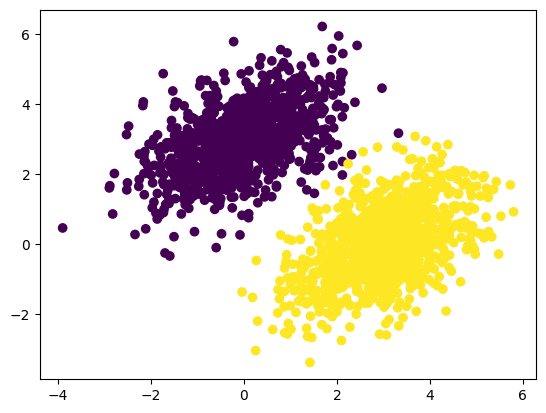

In [21]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**선형 분류기의 변수 만들기**

In [22]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**정방향 패스 함수**

In [23]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**평균 제곱 오차 손실 함수**

In [24]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**훈련 스텝 함수**

In [26]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**배치 훈련 루프**

In [27]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"{step}번째 스텝의 손실: {loss:.4f}")

0번째 스텝의 손실: 1.7582
1번째 스텝의 손실: 0.3165
2번째 스텝의 손실: 0.1395
3번째 스텝의 손실: 0.1117
4번째 스텝의 손실: 0.1021
5번째 스텝의 손실: 0.0951
6번째 스텝의 손실: 0.0890
7번째 스텝의 손실: 0.0834
8번째 스텝의 손실: 0.0784
9번째 스텝의 손실: 0.0737
10번째 스텝의 손실: 0.0695
11번째 스텝의 손실: 0.0656
12번째 스텝의 손실: 0.0621
13번째 스텝의 손실: 0.0589
14번째 스텝의 손실: 0.0559
15번째 스텝의 손실: 0.0532
16번째 스텝의 손실: 0.0508
17번째 스텝의 손실: 0.0485
18번째 스텝의 손실: 0.0465
19번째 스텝의 손실: 0.0446
20번째 스텝의 손실: 0.0429
21번째 스텝의 손실: 0.0414
22번째 스텝의 손실: 0.0399
23번째 스텝의 손실: 0.0386
24번째 스텝의 손실: 0.0374
25번째 스텝의 손실: 0.0364
26번째 스텝의 손실: 0.0354
27번째 스텝의 손실: 0.0345
28번째 스텝의 손실: 0.0336
29번째 스텝의 손실: 0.0329
30번째 스텝의 손실: 0.0322
31번째 스텝의 손실: 0.0316
32번째 스텝의 손실: 0.0310
33번째 스텝의 손실: 0.0305
34번째 스텝의 손실: 0.0300
35번째 스텝의 손실: 0.0295
36번째 스텝의 손실: 0.0291
37번째 스텝의 손실: 0.0288
38번째 스텝의 손실: 0.0284
39번째 스텝의 손실: 0.0281


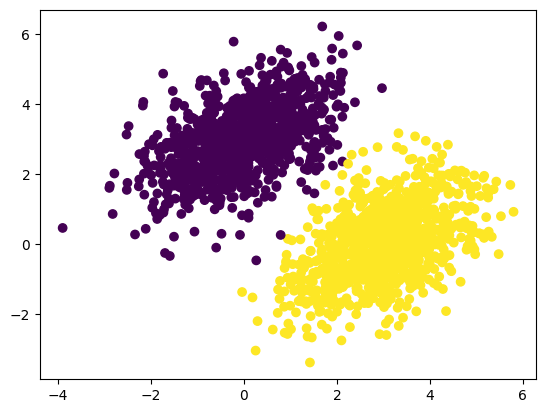

In [28]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

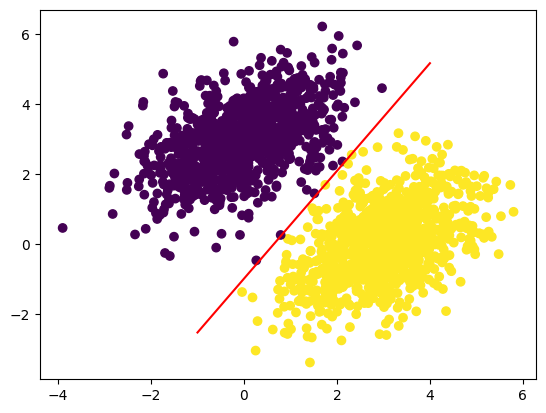

In [29]:
x = np.linspace(-1, 4, 100)
# 사실 100개의 x 축 좌표를 만들 필요 없이 시작과 종료 위치만 있어도 됩니다.
# x = [-1, 4]
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

## 신경망의 구조: 핵심 Keras API 이해하기

### 층: 딥러닝의 구성 요소

#### 케라스의 Layer 클래스

**`Layer`의 서브클래스로 구현한 `Dense` 층**

In [32]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [33]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### 자동 크기 추론: 동적으로 층 만들기

In [34]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [35]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [36]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### 층에서 모델로

### “컴파일” 단계: 학습 과정 설정

In [37]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [38]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### 손실 함수 선택하기

### fit() 메서드 이해하기

**넘파이 데이터로 `fit()` 메서드 호출하기**

In [39]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 2s 3ms/step - loss: 18.1317 - binary_accuracy: 0.0165
Epoch 2/5
16/16 [==============================] - 0s 3ms/step - loss: 17.6094 - binary_accuracy: 0.0170
Epoch 3/5
16/16 [==============================] - 0s 3ms/step - loss: 17.1631 - binary_accuracy: 0.0170
Epoch 4/5
16/16 [==============================] - 0s 3ms/step - loss: 16.7333 - binary_accuracy: 0.0175
Epoch 5/5
16/16 [==============================] - 0s 3ms/step - loss: 16.3070 - binary_accuracy: 0.0175


In [40]:
history.history

{'loss': [18.131683349609375,
  17.609447479248047,
  17.163137435913086,
  16.733335494995117,
  16.307031631469727],
 'binary_accuracy': [0.016499999910593033,
  0.017000000923871994,
  0.017000000923871994,
  0.017500000074505806,
  0.017500000074505806]}

### 검증 데이터에서 손실과 측정 지표 모니터링하기

**`validation_data` 매개변수 사용하기**

In [41]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 5ms/step - loss: 0.3133 - binary_accuracy: 0.9536 - val_loss: 0.0340 - val_binary_accuracy: 0.9983
Epoch 2/5
88/88 [==============================] - 1s 7ms/step - loss: 0.0703 - binary_accuracy: 0.9543 - val_loss: 0.1071 - val_binary_accuracy: 0.9983
Epoch 3/5
88/88 [==============================] - 1s 10ms/step - loss: 0.0761 - binary_accuracy: 0.9514 - val_loss: 0.0382 - val_binary_accuracy: 0.9967
Epoch 4/5
88/88 [==============================] - 1s 11ms/step - loss: 0.0707 - binary_accuracy: 0.9557 - val_loss: 0.0685 - val_binary_accuracy: 0.9683
Epoch 5/5
88/88 [==============================] - 1s 10ms/step - loss: 0.0684 - binary_accuracy: 0.9650 - val_loss: 0.2168 - val_binary_accuracy: 0.5800


### 추론: 훈련한 모델 사용하기

In [42]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 2ms/step
[[ 0.34932047]
 [ 0.06877127]
 [ 0.34220845]
 [ 0.25558937]
 [ 0.23237887]
 [ 0.7474222 ]
 [-0.02469927]
 [ 0.09676865]
 [ 0.05124822]
 [-0.02047324]]


## 요약